In [39]:
import numpy as np
import networkx as nx
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import itertools 


Consider the following system of differential equations that describe the dynamics of oscillators with high-order interactions of order 2: 

$$\dot{\theta_i} = \omega + \frac{\gamma_1}{\langle K^{(1)} \rangle } \sum_{j= 1}^N A_{ij} \sin(\theta_j - \theta_i) +  \frac{\gamma_2}{2!\langle K^{(2)} \rangle } \sum_{j, k= 1}^N B_{ijk} \sin(\theta_j + \theta_k - 2\theta_i) $$

We aim to integrate this system forward with respect to an example star-clique network where we have a star of size $N_s = 4$ and a clique of size $N_c = 3$. 

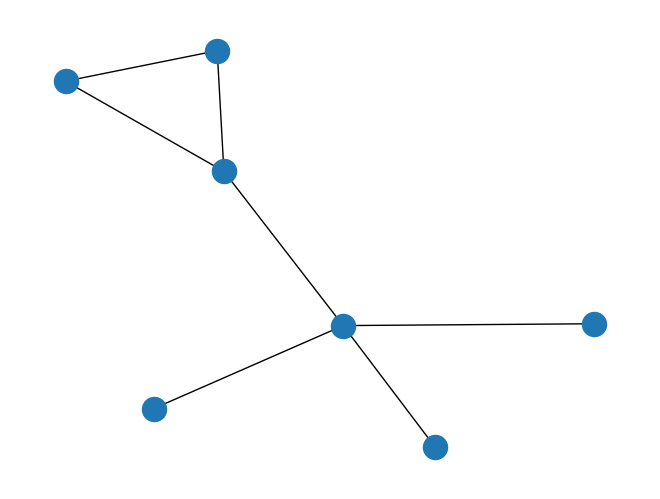

In [3]:
###########################
#### Define the network####
###########################
edges = [(0, 1), (0, 2), (0, 3), (0, 4), (4, 5), (5, 6), (6, 4)]
G = nx.Graph()
G.add_edges_from(edges)
nx.draw(G)

In [21]:
################################
#### Differential Eq Set Up ####
################################



# Create adjacency matrices for pairwise and triplet interactions
N = 7  # Number of nodes
A = np.zeros((N, N))
B = np.zeros((N, N, N))


for i, j in edges:
    A[i, j] = 1
    A[j, i] = 1


triplet_edges = [(4, 5, 6)] # The clique is among nodes (4, 5, 6)
for i, j, k in triplet_edges:
    B[i, j, k] = B[i, k, j] = B[j, i, k] = B[j, k, i] = B[k, i, j] = B[k, j, i] = 1

# Parameters
omega = 1.0
gamma_1 = 1.0
gamma_2 = 0.5
K1_avg = np.mean(np.sum(A, axis=0))
K2_avg = np.mean(np.sum(B, axis=(1, 2)))

# Differential equation
def dtheta_dt(t, theta):
    dtheta = np.zeros(N)
    for i in range(N):
        sum1 = np.sum(A[i, :] * np.sin(theta - theta[i]))
        sum2 = 0
        for j in range(N):
            for k in range(N):
                if B[i, j, k]:
                    sum2 += np.sin(theta[j] + theta[k] - 2 * theta[i])
        dtheta[i] = omega + (gamma_1 / K1_avg) * sum1 + (gamma_2 / (2 * K2_avg)) * sum2
    return dtheta




In [22]:
# Initial conditions
theta0 = np.random.uniform(0, 2*np.pi, N)

# Time span
t_span = (0, 100)
t_eval = np.linspace(t_span[0], t_span[1], 200)

# Solve the system
sol = solve_ivp(dtheta_dt, t_span, theta0, t_eval=t_eval)



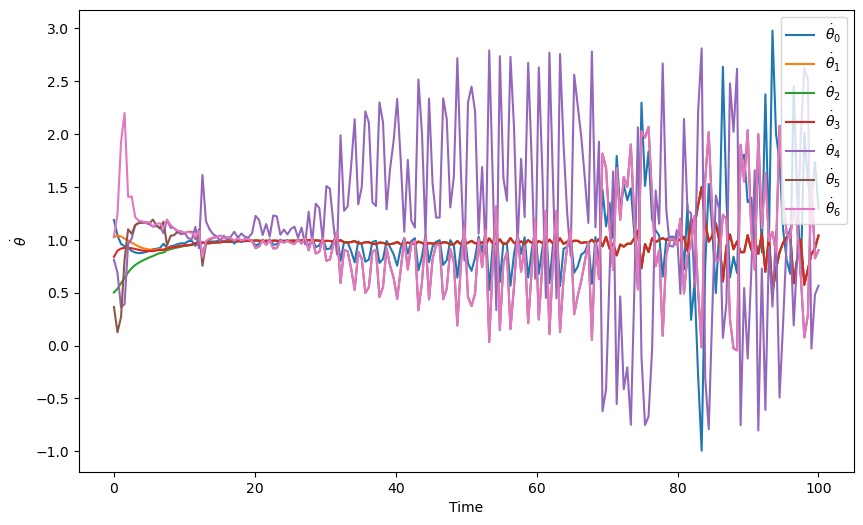

In [27]:
# Calculate dtheta/dt at each time step
dtheta_dt_values = np.array([dtheta_dt(t, theta) for t, theta in zip(sol.t, sol.y.T)])

# Plotting the results
plt.figure(figsize=(10, 6))
for i in range(N):
    plt.plot(sol.t, dtheta_dt_values[:, i], label=f'$\dot{{\\theta}}_{i}$')
plt.xlabel('Time')
plt.ylabel('$\dot{\\theta}$')
plt.legend()
plt.show()

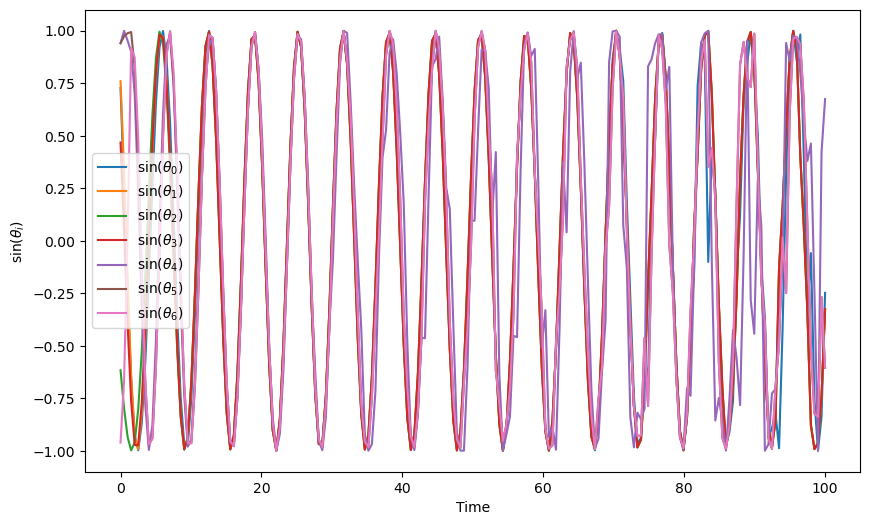

In [28]:
# Calculate sine of phases
sin_theta = np.sin(sol.y)

# Plotting the results
plt.figure(figsize=(10, 6))
for i in range(N):
    plt.plot(sol.t, sin_theta[i], label=f'$\\sin(\\theta_{i})$')
plt.xlabel('Time')
plt.ylabel('$\\sin(\\theta_i)$')
plt.legend()
plt.show()